# Datos

In [3]:
import yfinance as yf
import pandas as pd

In [ ]:
# Lista de empresas solo EEUU
#tickers = [
   # "AMZN","KO","UBER","PEP","TSLA","AAPL","MSFT","NVDA","NFLX",
# "DIS","NKE","F","WMT","PFE","META","GOOG","MA","V"
# ]

# Descargar datos
# data = yf.download(
  #  tickers,
   # start="2020-01-01",
    # end="2025-10-30",
    # group_by="ticker"
# )

# Convertir a formato largo (tidy)
# frames = []
# for ticker in tickers:
  #  df_temp = data[ticker].copy()
  #  df_temp["Ticker"] = ticker
  #  frames.append(df_temp)

# df = pd.concat(frames)
# df.reset_index(inplace=True)

# Guardar CSV
# df.to_csv("Datos.csv", index=False)

#print("Archivo creado: Datos.csv")
# df.head()


C:\Users\rjavi\AppData\Local\Temp\ipykernel_12128\724441652.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(
[*********************100%***********************]  18 of 18 completed


✅ Archivo creado: Datos.csv


Price,Date,Open,High,Low,Close,Volume,Ticker
0,2020-01-02,93.750000,94.900497,93.207497,94.900497,80580000,AMZN
1,2020-01-03,93.224998,94.309998,93.224998,93.748497,75288000,AMZN
2,2020-01-06,93.000000,95.184502,93.000000,95.143997,81236000,AMZN
3,2020-01-07,95.224998,95.694504,94.601997,95.343002,80898000,AMZN
4,2020-01-08,94.902000,95.550003,94.321999,94.598503,70160000,AMZN


In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("Datos.csv")

df["Date"] = pd.to_datetime(df["Date"])
df = df.sort_values(by="Date")

df.head() #Ya está ordenado por fecha

,Date,Open,High,Low,Close,Volume,Ticker
0,2020-01-02,93.750000,94.900497,93.207497,94.900497,80580000,AMZN
4395,2020-01-02,115.103413,115.406162,113.648540,114.220406,3784100,PEP
24905,2020-01-02,181.513057,183.568284,181.244150,183.549072,8733000,V
5860,2020-01-02,28.299999,28.713333,28.114000,28.684000,142981500,TSLA
7325,2020-01-02,71.545875,72.598876,71.292289,72.538498,135480400,AAPL


In [43]:
colores_empresas = {
    "AMZN": "#2ca02c",  
    "KO":   "#FF0000",   
    "UBER": "#000000",   
    "PEP":  "#005CB8",  
    "TSLA": "#CC0000",   
    "AAPL": "#1f77b4",   
    "MSFT": "#BE8C00",   
    "NVDA": "#76B900",   
    "NFLX": "#E50914",   
    "DIS":  "#113CCF",  
    "NKE":  "#111111",   
    "F":    "#003399",   
    "WMT": "#0071CE",   
    "PFE": "#0082D1",   
    "META": "#4267B2",  
    "GOOG": "#4285F4",  
    "MA":   "#FF5F00",  
    "V":    "#0057B8"  
}

In [37]:
def graficar_empresa(nombre_empresa):

    empresa_df = df[df["Ticker"] == nombre_empresa] # Filtrar los datos de la empresa elegida

    if empresa_df.empty:
        print(f"No se encontraron datos para la empresa: {nombre_empresa}")
        return
    
    # Crear el gráfico
    plt.figure(figsize=(10,5))
    plt.plot(empresa_df["Date"], empresa_df["Close"], label=nombre_empresa, linewidth=2)

    # Detalles estéticos
    plt.title(f"Precio histórico de {nombre_empresa}")
    plt.xlabel("Fecha")
    plt.ylabel("Precio de Cierre")
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend()
    plt.tight_layout()
    plt.show()

In [39]:
def graficar_empresa(nombre_empresa):
    empresa_df = df[df["Ticker"] == nombre_empresa].copy()

    if empresa_df.empty:
        print(f"No se encontraron datos para la empresa: {nombre_empresa}")
        return
    
    # Convertir fechas
    empresa_df["Date"] = pd.to_datetime(empresa_df["Date"])

    # Color elegido
    color = colores_empresas.get(nombre_empresa, "#000000")  # Negro si no está en el diccionario

    # ---- Gráfico ----
    fig, ax = plt.subplots(figsize=(12,6))

    # Línea del precio de cierre
    ax.plot(empresa_df["Date"], empresa_df["Close"], linewidth=2, label=nombre_empresa, color=color)

    # Eje X: solo años
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

    # Estética
    ax.set_title(f"Precio Histórico - {nombre_empresa}", fontsize=14)
    ax.set_xlabel("Año")
    ax.set_ylabel("Precio")
    ax.grid(True, linestyle='--', alpha=0.4)
    ax.legend()
    plt.tight_layout()
    plt.show()

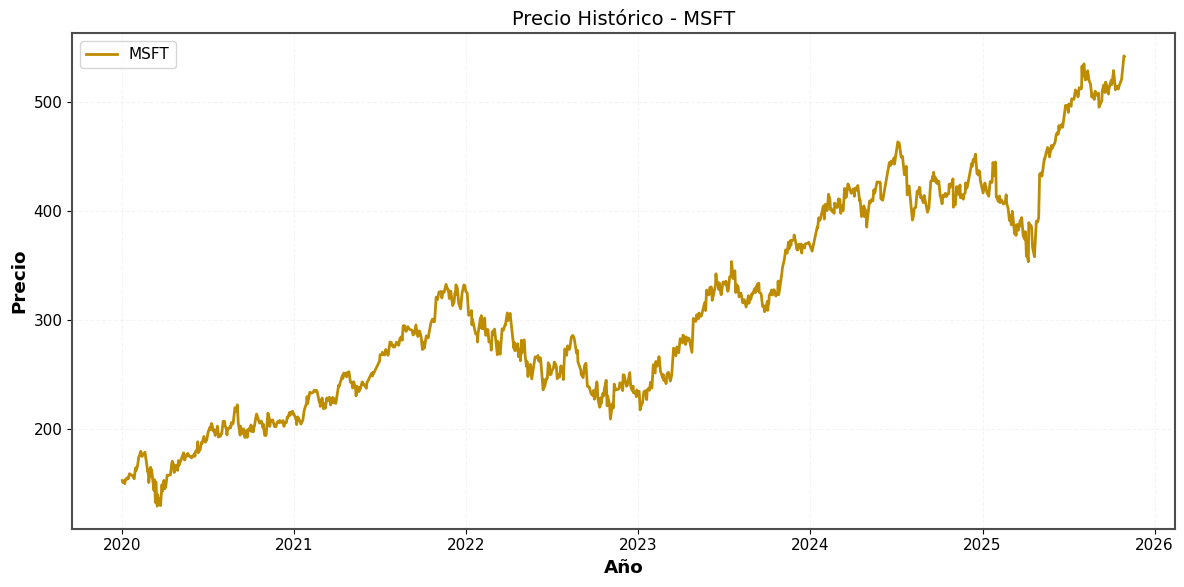

In [44]:
graficar_empresa("MSFT")

# Grafico comparativo

In [51]:
import matplotlib.pyplot as plt

def graficar_comparativo(lista_empresas, df):

    plt.figure(figsize=(12,6))
    empresas_validas = False
    
    for empresa in lista_empresas:
        empresa_df = df[df["Ticker"] == empresa]

        if empresa_df.empty:
            print(f"⚠️ No se encontraron datos para la empresa: {empresa}")
            continue
        
        empresas_validas = True
        
        # Obtener color asignado o uno por defecto si no está en el diccionario
        color = colores_empresas.get(empresa, None)

        plt.plot(empresa_df["Date"], empresa_df["Close"], 
                 label=empresa, linewidth=2, color=color)

    if not empresas_validas:
        print("No se pudo graficar porque ninguna empresa tenía datos.")
        return

    plt.title("Comparación del Precio de Cierre entre Empresas")
    plt.xlabel("Fecha")
    plt.ylabel("Precio de Cierre")
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.legend(title="Empresas")
    plt.tight_layout()
    plt.show()


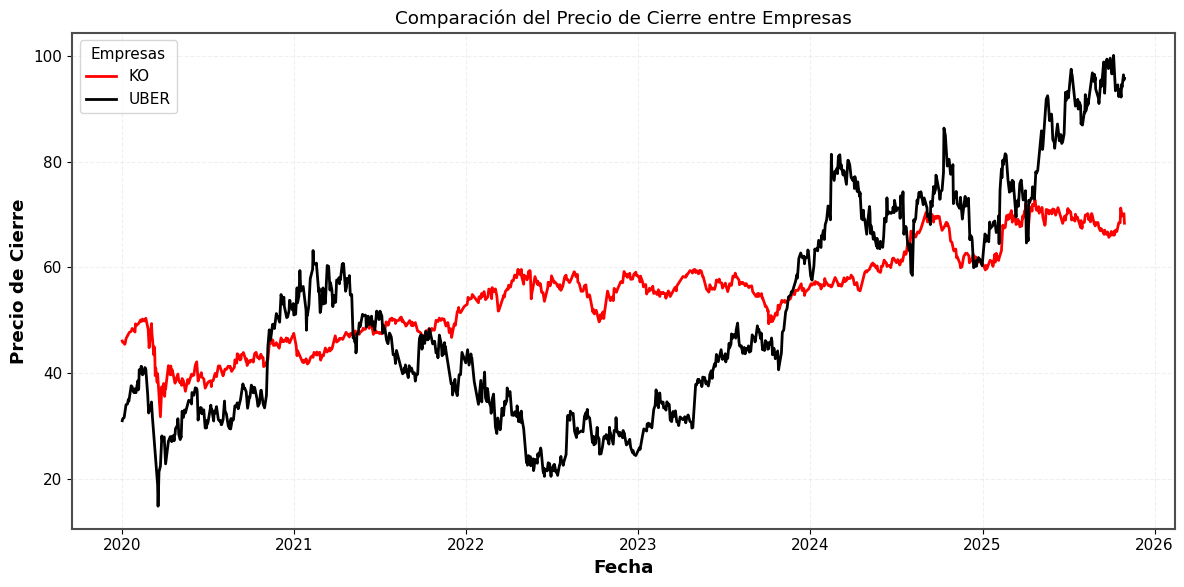

In [52]:
empresas = ["KO","UBER"]
graficar_comparativo(empresas, df)